In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Has card and is active member - Categorical variable only encoded.
#Geography, gender - Categorical variable and has to be encoded.
#rest are continuous variables

#Remove the redundant columns

In [4]:
X = dataset.iloc[:,3:13].values

#iloc function allows to locate the row and column from where we want to picku-up the sata.: 
#Singifies picking up all the rows
#3:13 signifies picking up column number 3 to 13.
#This data is in the form of panel data which will not allow further mathematics to happen.
#We need to convert it into numerical python array
#in short we need a numpy array on which we can work.
#this is acheived by putting .values

#The values 13 does not reflect the last column, python at 13-1 = 12th column
#start:stop -> start at a particular index BUT stop one before defined stopping point.
#Starting index =0

type(X)
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
#Split the X's and Y's so that we can make a model we input the X's and get the Y.

In [6]:
#we have selected the column 13, exited as y variable for all the rows
#to make things work on python we have to convert the panel data into numpy array.

y = dataset.iloc[:,13].values

#y.head()
#head is reserved for panel data not here numpy array

type(y)
y

array([1, 0, 1, ..., 1, 1, 0])

We have to convert the categorical data that is Geography and Gender into numaerical data. We will do using the LabelEncoded and OneHot Encoder which is in Sklearn. 

Apple, Oranges and Mangoes. If they are LabelEncoded it will be 1,2 and 3 where 1 represents Apple, 2 - Oangaes and 3 - Mangoes.

One hot encoding (Every vector has to be 1 and rest 0):
Apple - 1 -> 0 0 1
Oranges - 2 -> 0 1 0
Mangoes - 3 -> 1 0 0

Every category is represented by a set of Zeroes and Only one 1.

In [7]:
#categorical encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Pass on the functionality of the library LabelEncoder to another variable
#which is easier to use as proceed
labelencoder = LabelEncoder()
#Now we have to do the labelencoding for gender

#function fit_transfer: - It fits the label encoder function on to the selected
#which in this case happens to be gender.
#Label encoder will convert male/female to 1 & 0.
#No need for one hot encoding since gender is binary.
#If category is more than binary (2) then one hot encoder is needed.

X[:,2] = labelencoder.fit_transform(X[:,2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [8]:
#The next step is to label encode the geography - 3 countries -> 0,1,2 gives rank

X[:,1] = labelencoder.fit_transform(X[:,1])
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

Hot encoding - we need to use column transfer. This function is a tuple and three arguments ColumnTransfer(name,object,coumn number) we implement it in the following manner


In [9]:
#Get the library from sklearn.compose

from sklearn.compose import ColumnTransformer

#OneHot Encoder has been applied to column
#I have given the ColumnTransformer function a name of my choice which is country
#The functionality has been passed onto the variable ct but still not applied on the data

ct = ColumnTransformer([("country",OneHotEncoder(),[1])], remainder ="passthrough")
#reminder - apply to only first column and rest of the data untouched.

#we shall now apply on data
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

The next step wouble be remove the dummy variable trap and then scale the data 

---

so that we can use it for building our neural network in Keras.

First 3 columns of the dataset are one-hot encoded numbers pertaining to Spain, Germany and France. 

After one hot encoding location of Geography changed. One hot encoded shifts to beginning of the column

Convert the data into dataframe for each of understanding. 
Replace the countries with X1, X2 and X3 the values we have after one-hot encoding. The countires have been replaced by X1, X2 and X3 which is a vector.

Example: France is now 1,0,0
Spane - 0,0,1


In [10]:
# Callt the pandas dataframe command to convert the data into a frame which can be used further.
#Note that you are converting data type from Numpy array to Pandas.

X = pd.DataFrame(X, columns = ["X1","X2","X3","Credit Score","Gender","Age","Tenure","Balance","NumofProducts","HasCrCard","IsActive member","Estimated Salary"])
X

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive member,Estimated Salary
0,1,0,0,619,0,42,2,0,1,1,1,101349
1,0,0,1,608,0,41,1,83807.9,1,0,1,112543
2,1,0,0,502,0,42,8,159661,3,1,0,113932
3,1,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270.6
9996,1,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,1,0,0,709,0,36,7,0,1,0,1,42085.6
9998,0,1,0,772,1,42,3,75075.3,2,1,0,92888.5


We want to avoid the dummy variable trap associated with Country variables X1, X2 and X3. We eliminated one of the variables that is X1 - We caould have chosen X2 or X3 also.

In [11]:
#From the dataframe drop X1
#axis = 1 indicates where should Python look for the variables X1
#It should look for X1 along the X-axis and hence axis is set to 1
#If looking along the Y-asis the axis should be set to 0

X = X.drop("X1", axis=1)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive member,Estimated Salary
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


We have to split the data into training and test data. test size - 20%.

In [12]:
#The train_test_spit library function is located in sklearn.model_selection

from sklearn.model_selection import train_test_split

#We have to set the random_state and make sure we all have the same value
#In this case it is 0
#What is random state? It is like the SEED that we use in Excel.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

Feature scaling
Should we do it before spliting or after spliting?

Standardization entails X-u/sigma.
Now, if you standardize before splitting the dataset will have only one Unique Average aks u and one unique standard deviation aks sigma,
However when we split the data there are two groups. Train and test.
The train data will have a different mean and standard deviation from the test data. So standardizing the train data using the mean and standard deviation of training sample is accurate.
Similarly standardizing the train data using the mean and standard deviation of the samples inside the test deta is more accurate.
Therefore, we must split the data before we standardize the data to ensure accuracy in measurement of the separate groups or samples.

In [14]:
#Feature scaling
#To standardize the data get the StandardScalar function from skelarn.preprocessing

from sklearn.preprocessing import StandardScaler
#Pass on the functionality to a new variable called sc

sc = StandardScaler()

#Standardize the data
#fit_transform is being done on Xtrain data

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
#Importing the Keras libraries and packages
import keras
#sequential because the model has all layers in a sequence.
from keras.models import Sequential
#Dense implies hidden layers which we cannot from outside
#These are built in Keras functions
from keras.layers import Dense

#Initialising the Deep Learning Model
classifier= Sequential()
#Adding the input layer
#Input_dim = 11
#The first hidden layer has 6 units, weights are taken randomly from an uniform distribution and activation is Relu
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
#Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
#Adding the poutpu layer
#Here the actiation function is sigmoid as it is a binary classification problem
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

#Compiling the DNN
classifier.compile(optimizer ='adam', loss='binary_crossentropy',metrics=['accuracy'])
#Fitting the DNN to the training set
classifier.fit(X_train,y_train, batch_size=10, epochs =10)

Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4862 - accuracy: 0.7959
Epoch 2/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4290 - accuracy: 0.7960
Epoch 3/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4238 - accuracy: 0.7960
Epoch 4/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4197 - accuracy: 0.8138
Epoch 5/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4165 - accuracy: 0.8246
Epoch 6/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4152 - accuracy: 0.8286
Epoch 7/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4136 - accuracy: 0.8289
Epoch 8/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8325
Epoch 9/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4114 - accuracy: 0.8314
Epoch 10/10
800/800 [==============================] - 1s 1ms/step - loss: 0.4108 - accuracy: 0.8339

In [ ]:
#There are 11 inputs and 1 output. We have selected 2 layers in the middle. Each should have 6 nodes. The activations function are Relu inside the structure and outside we have Sigmoid. Our optimizer is Adam and the loss function is binary cross entropy. The metrics we are interested in is Accuracy.
#Epoch are 100 and the batch size is taken we 10. We are implicitly implementing Batch Stochasic Gradient.

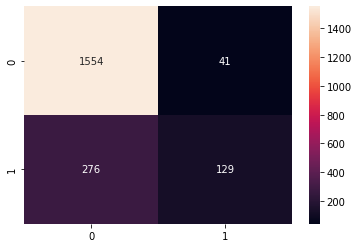

In [17]:
import seaborn as sns
#Predicting the Test set results
#Send the test dasta through the trained model
#Get the probability of prediction
#Determine if the value is less than or more than the cut-off value
y_pred =  classifier.predict(X_test)
#Here I have chosen 0.5 as the cut-off value
#if it is more than 0.5 then I have assigned it 1 otherwse 0
#y_test has the actual class information which will compare the predicted class information
y_pred = (y_pred > 0.5)


#Making the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');


Model Predicts 0 and Actual is o: 1534
Model Predicts 1 and Actual is 1: 150
Model Predicts 1 and Actual is 1: 255

In [18]:
#Accuracy is based on the diagnol elements
(1554+129)/2000

0.8415

In [20]:
#New Customer
#Geography: France (0,0)
#Credit Score: 600
#Gender: Male (1)
#Age: 40 years old
#Tenure: 3 years
#Balance: $60000
#Number of Products: 2
#Does this customer have a credit card? Yes(1)
#Is this customer an ctive Member: Yes(1)
#Estimated Salary: $50000
#Predicted the class of this customer

#It is not straight forward
#The bracket for a numpy array in numpy in Python is ([])
#So why are we using ([]) this?
#We need o transpose the data from horizontal to vertical 
#In alignment with the input nodes
#This raw data has to be scaled before it can be fitted into the model
#Apply sc.transform 
new_customer = classifier.predict(sc.transform(np.array([[0,0,600,1,40,3,60000,2,1,1,50000]])))
new_prediction = (new_customer>0.5)
new_prediction

array([[False]])

In [ ]:
#Eavaluting the DNN (Deep Neural Network) A- Artificial
#Load all the relevent libraries
#The new ones are mentioned cross_val_score
#KerasClassifier

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

#Make an user defined empty function.
#This function is called build_classifier

def build_classifier():
  classifier= Sequential()
#Adding the input layer
#Input_dim = 11
#The first hidden layer has 6 units, weights are taken randomly from an uniform distribution and activation is Relu
  classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
#Adding the second hidden layer
  classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
#Adding the poutpu layer
#Here the actiation function is sigmoid as it is a binary classification problem
  classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
  classifier.compile(optimizer = 'adam', loss='binary_crossentropy',metrics = ['accuracy'])
  return classifier

#Once the classifier has been created the batch size and epoch
#The user defined function "build classifier" becomes an argument to the KerasClassifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size =10, epochs = 10)

#Computation of accuracy scores
#The estimator used is the classifier, data and cross validation is 10
#n_jobs is a python indicator to say if you are using GPU or not for processing

accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =1)

#Get the mean of accuracy and the variance accuracy
mean = accuracies.mean()
variance = accuracies.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/10
720/720 [==============================] - 4s 4ms/step - loss: 0.4880 - accuracy: 0.7969
Epoch 2/10
720/720 [==============================] - 2s 2ms/step - loss: 0.4284 - accuracy: 0.7971
Epoch 3/10
720/720 [==============================] - 2s 2ms/step - loss: 0.4239 - accuracy: 0.7971
Epoch 4/10
720/720 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.8093
Epoch 5/10
720/720 [==============================] - 1s 1ms/step - loss: 0.4179 - accuracy: 0.8233
Epoch 6/10
720/720 [==============================] - 1s 1ms/step - loss: 0.4158 - accuracy: 0.8261
Epoch 7/10
720/720 [==============================] - 1s 1ms/step - loss: 0.4146 - accuracy: 0.8315
Epoch 8/10
720/720 [==============================] - 1s 1ms/step - loss: 0.4132 - accuracy: 0.8322
Epoch 9/10
720/720 [==============================] - 1s 1ms/step - loss: 0.4121 - accuracy: 0.8310
Epoch 10/10
80/80 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8338
E

In [ ]:
print(mean)
print(variance)

0.831124997138977
0.009928649193784974


In [ ]:
#Tunning the DNN
#Copy and paste the library functions from the previous set of code

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

#Copy and paste the user defined build_classifier function that you created
#Inside the bracket type the argument as optimizer

def build_classifier(optimizer = 'adam'):
  classifier= Sequential()
#Adding the input layer
#Input_dim = 11
#The first hidden layer has 6 units, weights are taken randomly from an uniform distribution and activation is Relu
  classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
#Adding the second hidden layer
  classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
#Adding the poutpu layer
#Here the actiation function is sigmoid as it is a binary classification problem
  classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
  
# Replace Adam by the optimizer. Be careful with case and spelling  
  classifier.compile(optimizer = optimizer, loss='binary_crossentropy',metrics = ['accuracy'])
  return classifier

#Copy and paste - delete the other information regarding batch size and epoch
#We will find out what is the optimal batch size and epoch for this model

#Once the classifier has been created the batch size and apoch
#The user defined function "build classifier" becomes an argument to the KerasClassifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size =10, epochs = 10)

#Create parameter as a dictionary. batch_size, epochs and optimizer are keys.
#Attached to the keys are values. This is driven by experience. Black Box!
#Create a dictionary of keys and values

parameters = {'batch_size':[25,32],
              'epochs':[10,50],
              'optimizer':['adam','rmsprop']}

#Grid search object has to be created and data has to be fitted on it

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

#Fitting the data on the grid_search object 
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/10
288/288 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7969
Epoch 2/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.7971
Epoch 3/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.7971
Epoch 4/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.7971
Epoch 5/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.7971
Epoch 6/10
288/288 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8257
Epoch 7/10
288/288 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.8304
Epoch 8/10
288/288 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.8328
Epoch 9/10
288/288 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8308
Epoch 10/10
288/288 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.8301

In [ ]:
#After training the neural network we want to identify the best parameters.
#These are attributes best_params_ and best_score_

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_